# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]
print(A)

[[-0.69192815 -0.80515549]
 [ 0.5394257   0.19951665]
 [-1.09515516  0.0778757 ]
 ...
 [-0.15631378  0.8438084 ]
 [-0.35989825  0.40381064]
 [ 0.10306912 -0.5264447 ]]


In [3]:
A[:,1]

array([-0.80515549,  0.19951665,  0.0778757 , ...,  0.8438084 ,
        0.40381064, -0.5264447 ])

## Exercise 1
Plot all raw data sets A-F in one figure. 3x2 oder 2x3 plots

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

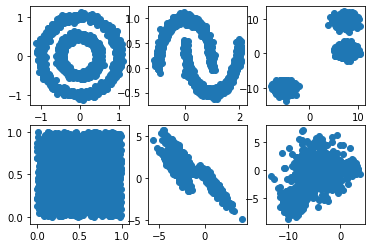

In [28]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows = nrows ,ncols = ncols)
ds = [A,B,C,D,E,F]
for i in range(nrows):
    for j in range(ncols):
        axes[i,j].scatter(ds[3*i+j][:,0],ds[3*i+j][:,1])
        

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

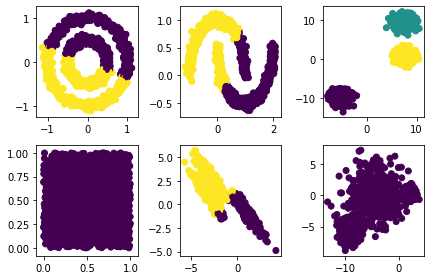

In [66]:
nrows = 2
ncols = 3


fig, axes = plt.subplots(nrows = nrows ,ncols = ncols)
ds = [A,B,C,D,E,F]
k = [2,2,3,1,2,1]

for i in range(nrows):
    for j in range(ncols):
        K_M = cluster.KMeans(n_clusters=k[ncols*i+j],init='k-means++').fit(ds[ncols*i+j])
        axes[i,j].scatter(ds[ncols*i+j][:,0],ds[ncols*i+j][:,1],c = K_M.labels_)
    

        
        
fig.tight_layout()

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


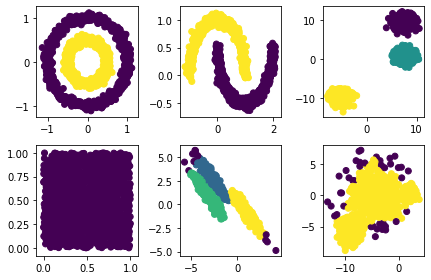

In [94]:
nrows = 2
ncols = 3


fig, axes = plt.subplots(nrows = nrows ,ncols = ncols)
ds = [A,B,C,D,E,F]
eps = [0.2,0.2,1.5,1,0.35,0.8]

for i in range(nrows):
    for j in range(ncols):
        K_M = cluster.DBSCAN(eps=eps[ncols*i+j]).fit(ds[ncols*i+j])
        axes[i,j].scatter(ds[ncols*i+j][:,0],ds[ncols*i+j][:,1],c = K_M.labels_)       
fig.tight_layout()